#### Introduction

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import matplotlib.ticker as ticker

In [2]:
zip_path = '../BD/Supermercado_onehot.zip' 
csv_filename = 'Supermercado_onehot.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

In [3]:
display(HTML(df.to_html(max_rows=5, max_cols=200, notebook=True)))

In [4]:
df = df.drop('department_id', axis=1)

In [5]:
column_names = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 
                'max_order', 'order_number_group_21-40 order', 'order_number_group_41-60 order',
                'order_number_group_61-80 order', 'order_number_group_81-100 order', 
                'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 
                'day_Wednesday', 'order_time_list_Dawn', 'order_time_list_Morning', 
                'order_time_list_Night', 'department_babies', 'department_bakery', 
                'department_beverages', 'department_breakfast', 'department_bulk', 
                'department_canned goods', 'department_dairy eggs', 'department_deli', 
                'department_dry goods pasta', 'department_frozen', 'department_household', 
                'department_international', 'department_meat seafood', 'department_missing', 
                'department_other', 'department_pantry', 'department_personal care', 
                'department_pets', 'department_produce', 'department_snacks', 
                'product_name_asian foods', 'product_name_baby accessories', 
                'product_name_baby bath body care', 'product_name_baby food formula', 
                'product_name_bakery desserts', 'product_name_baking ingredients', 
                'product_name_baking supplies decor', 'product_name_beauty']

department_columns = [col for col in column_names if col.startswith('department')]

print(department_columns)

['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 'department_canned goods', 'department_dairy eggs', 'department_deli', 'department_dry goods pasta', 'department_frozen', 'department_household', 'department_international', 'department_meat seafood', 'department_missing', 'department_other', 'department_pantry', 'department_personal care', 'department_pets', 'department_produce', 'department_snacks']


#### Clustering - K-Means

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

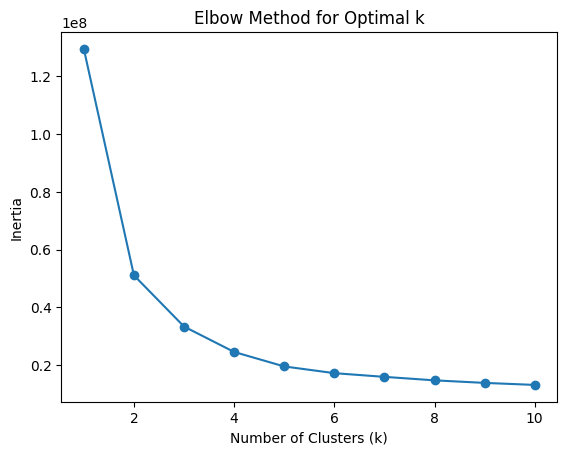

In [6]:
X = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


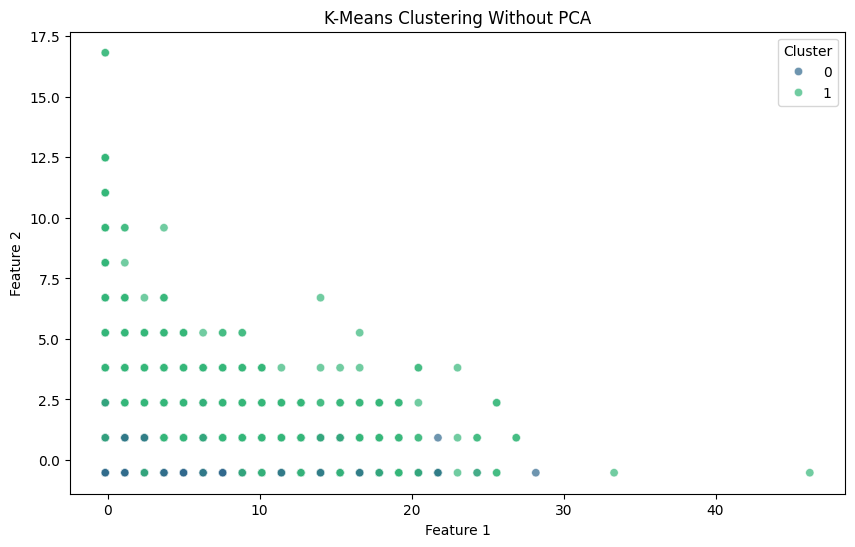

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans1 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans1.fit_predict(X_scaled)

df_c1 = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [8]:
df['Clusters_1'] = kmeans1.labels_

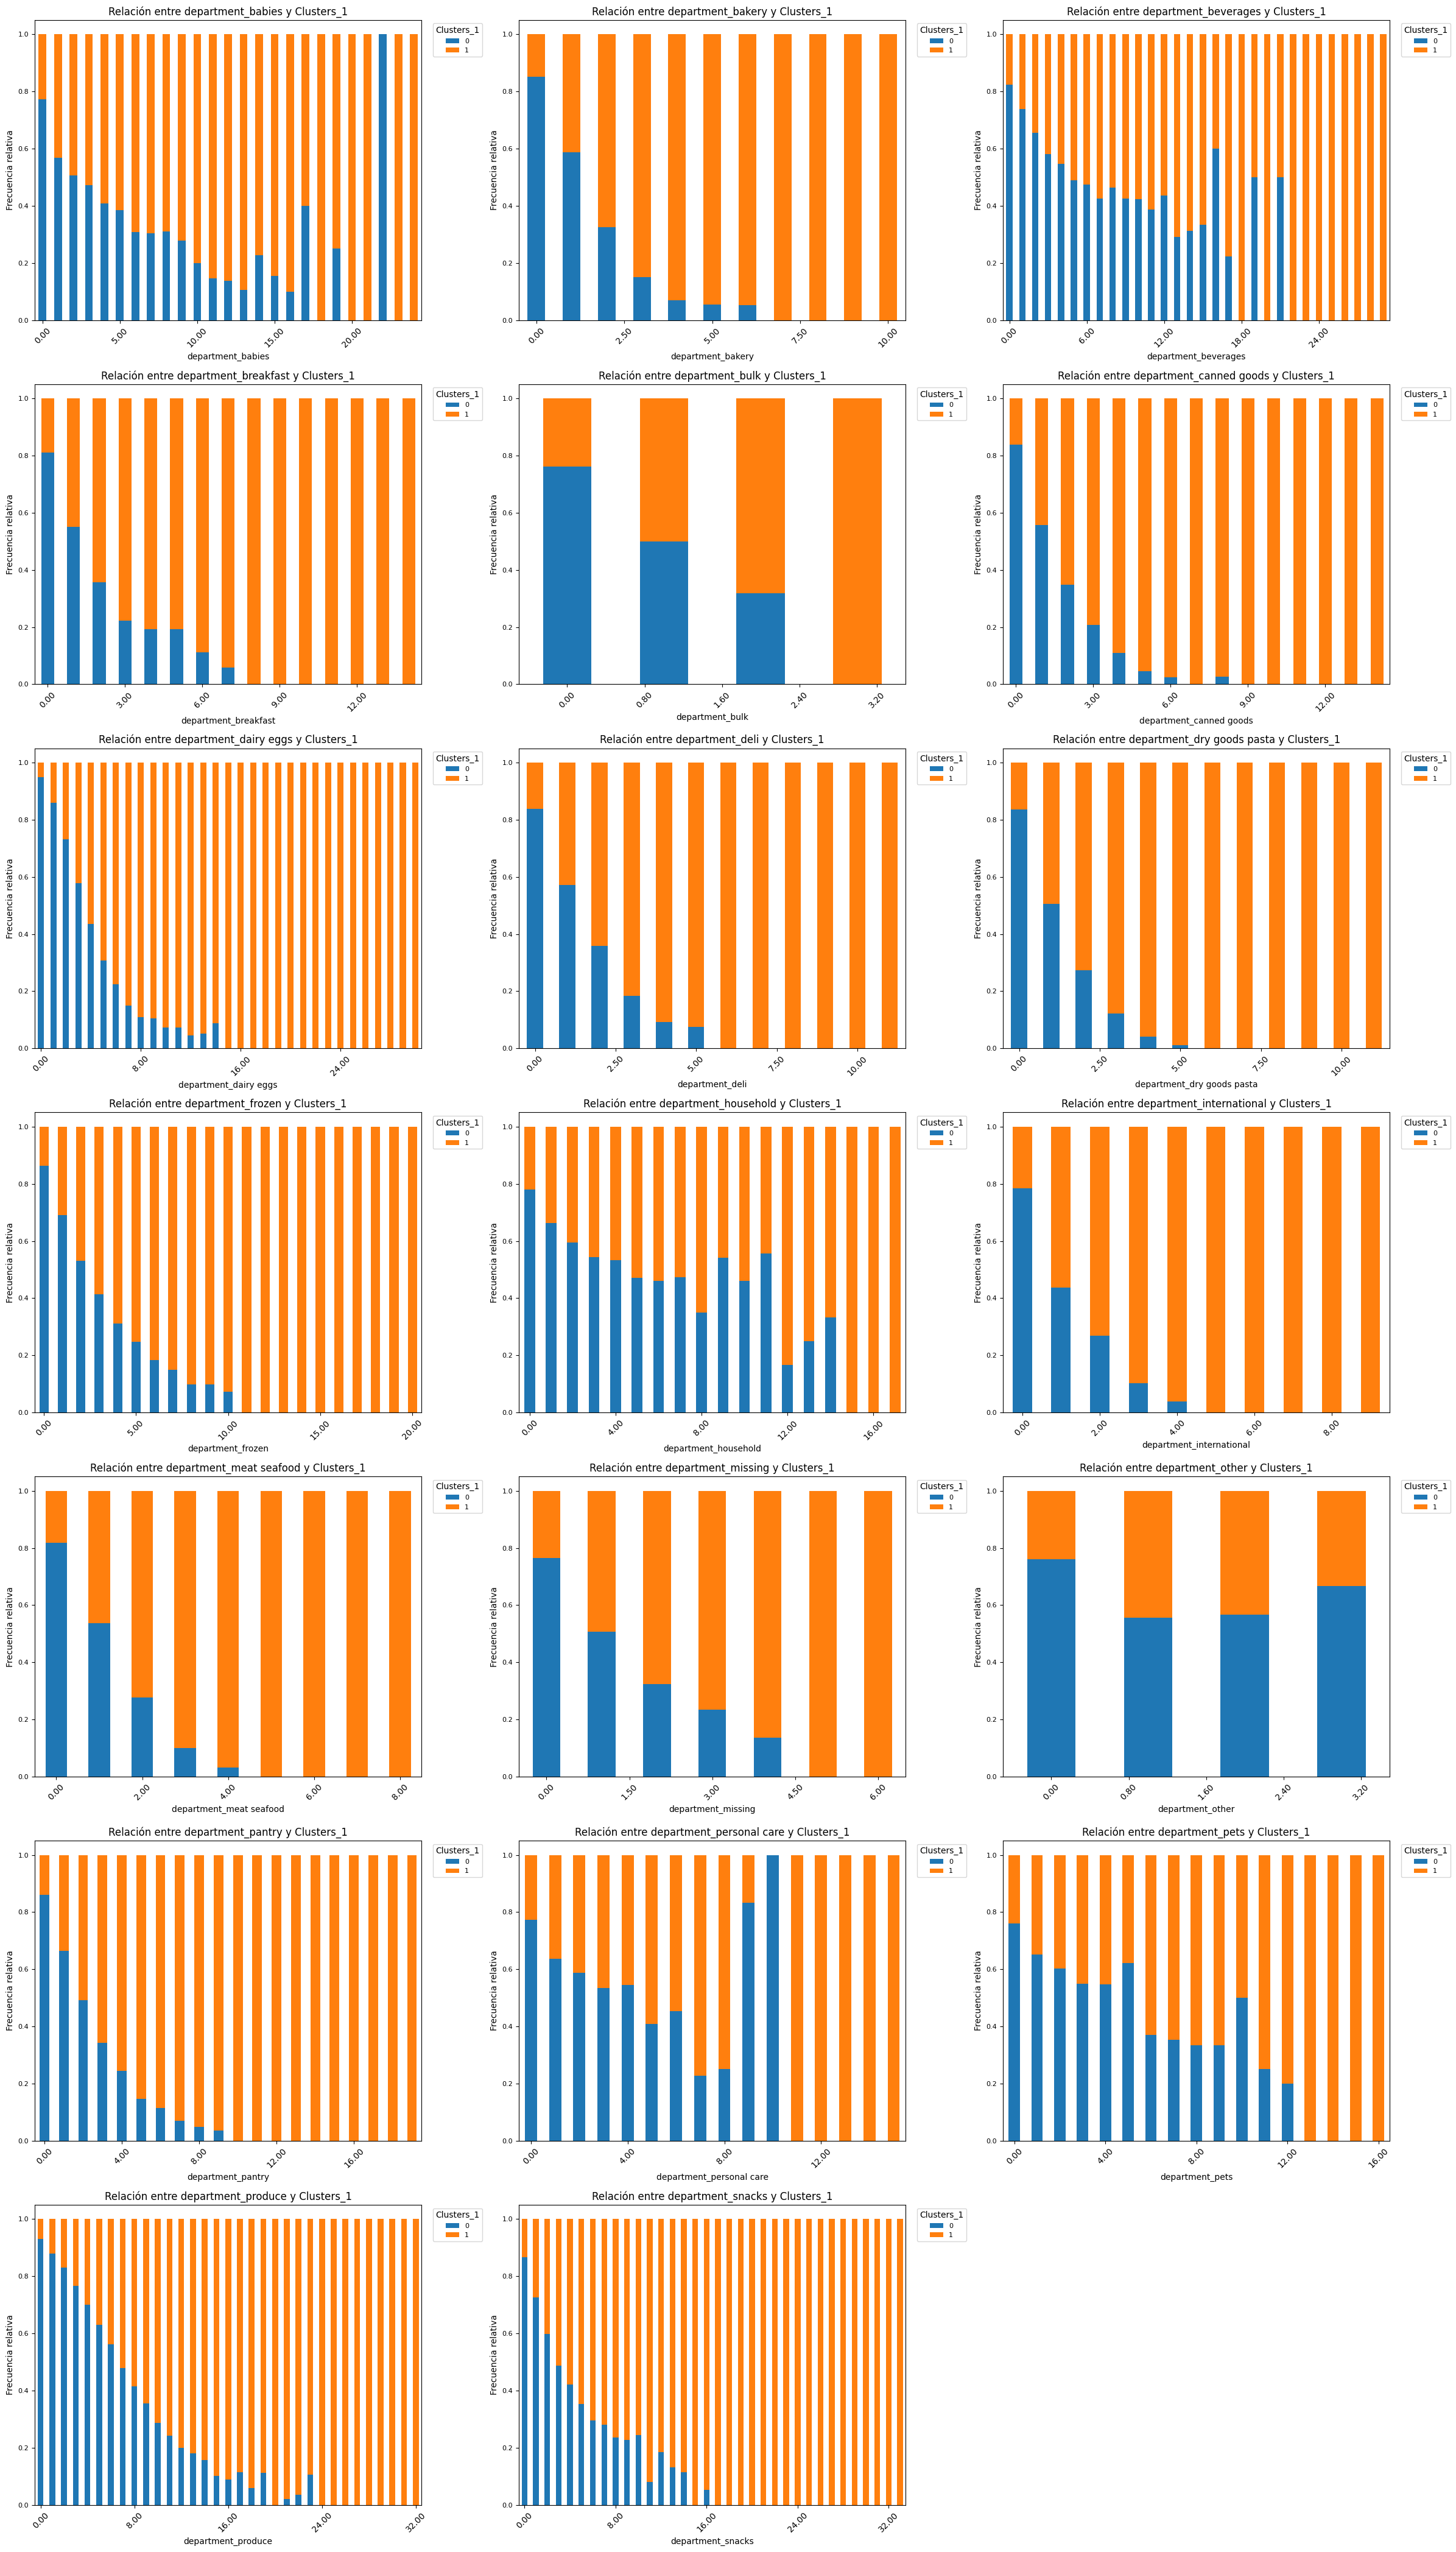

In [9]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_1'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_1', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_1', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


In [ ]:
stats = df.groupby('Clusters_1').agg(['mean', 'median'])

mode_df = df.groupby('Clusters_1').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

Distribución de Ordenes y Usuarios:

Los clústeres muestran diferencias en el número promedio de órdenes (order_id_mean) y usuarios (user_id_mean). Esto sugiere que algunos clústeres contienen usuarios que realizan compras más frecuentes o más altas en volumen.
El promedio y la mediana en ambas métricas son similares, lo que indica una distribución posiblemente simétrica en el comportamiento de los usuarios dentro de cada clúster.
Frecuencia y Horas de Compra:
En cuanto al día (order_dow) y la hora del día (order_hour_of_day) de las órdenes, se observa que ambos clústeres tienden a realizar compras durante horarios similares (alrededor de las 13:00 horas) y en días parecidos.
Aunque hay una ligera diferencia en el día de la semana preferido, las variaciones no son muy significativas. Esto sugiere patrones de compra estables a lo largo de la semana entre los clústeres.
Preferencias de Productos:

En las variables categóricas de productos, como product_name_spreads_mode o product_name_vitamins supplements_mode, los valores de moda son todos cero, lo que indica que estos productos no son particularmente populares en ninguno de los clústeres.
Es probable que estos productos representen categorías minoritarias o productos que no son de compra recurrente para la mayoría de los usuarios en este análisis.
Variabilidad en la Demanda:

La pequeña diferencia en el promedio de order_number_mean entre los clústeres sugiere que hay una ligera variación en el número de órdenes realizadas por cada usuario en diferentes clústeres. Los usuarios en el primer clúster parecen realizar menos pedidos en promedio que aquellos en el segundo clúster.
Esto podría indicar diferentes perfiles de clientes, donde un clúster tiene clientes con patrones de compra más frecuentes, mientras que el otro está compuesto por clientes más esporádicos.

Los clústeres parecen diferenciarse más en términos de volumen de órdenes y frecuencia de compras, mientras que no hay una preferencia marcada por categorías de productos específicos. Esto indica que los clústeres se pueden utilizar para crear estrategias de segmentación basadas en la frecuencia y volumen de compra, en lugar de preferencias de productos específicos.

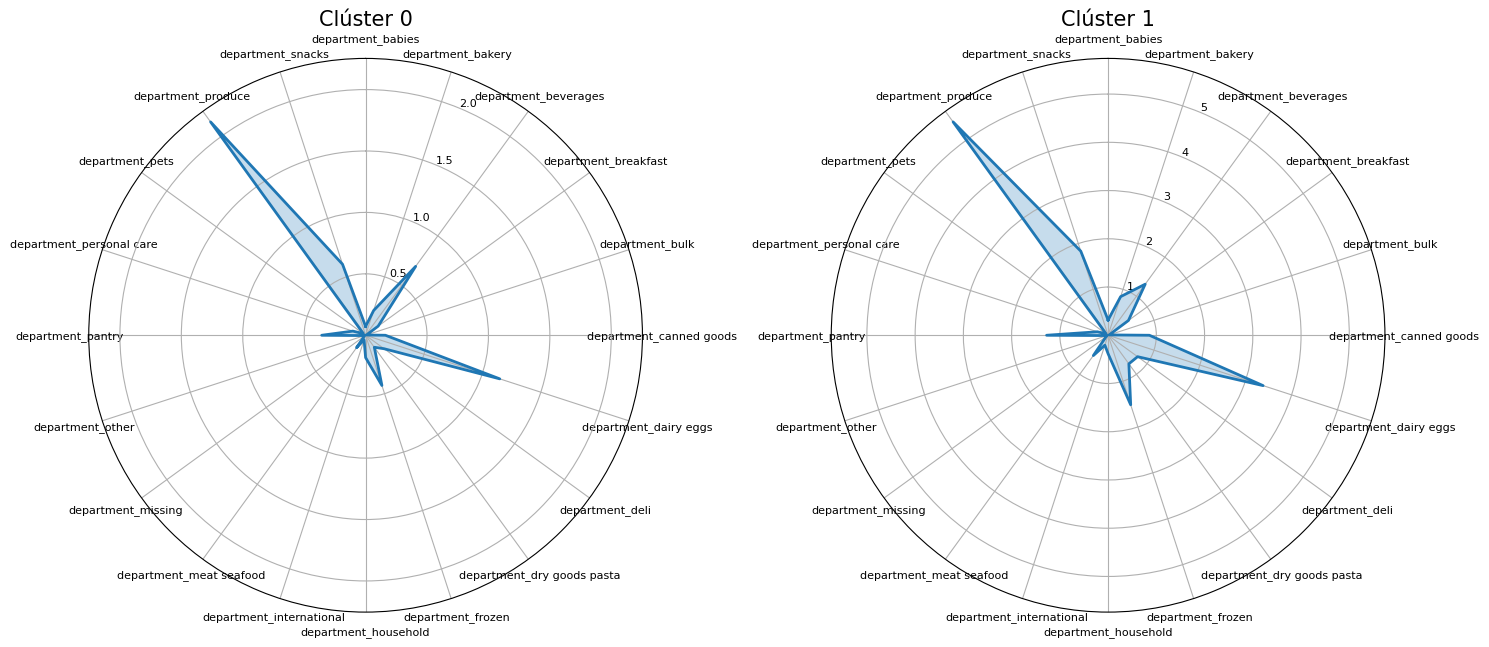

In [15]:
num_clusters = df['Clusters_1'].nunique()
categories = department_columns

fig, axes = plt.subplots(1, num_clusters, subplot_kw={'polar': True}, figsize=(15, 7))

for i, cluster in enumerate(df['Clusters_1'].unique()):
    values = df[df['Clusters_1'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1]  # Cerrar el gráfico de radar
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

Preferencia en el Departamento de "Produce":
Ambos clústeres muestran una preferencia destacada por el departamento de "Produce", pero es particularmente pronunciada en el clúster 1, donde este departamento tiene una mayor representación en comparación con otros.
Esto sugiere que el clúster 1 podría estar compuesto por usuarios que compran más productos frescos o que tienen hábitos de consumo más orientados hacia alimentos naturales.

Consumo en Otros Departamentos:
En ambos clústeres, la representación en la mayoría de los otros departamentos es baja en comparación con "Produce". Sin embargo, el clúster 1 muestra un consumo algo mayor en los departamentos de "Beverages", "Breakfast", y "Canned Goods" en comparación con el clúster 0.
Esto podría indicar que los usuarios en el clúster 1 tienen una tendencia a diversificar sus compras en varias categorías, mientras que el clúster 0 parece más concentrado en unos pocos departamentos.

Diferencias en Categorías Específicas:
El clúster 1 tiene una representación superior en el departamento de "Beverages" (bebidas) y "Breakfast" (desayuno), lo que podría indicar un perfil de consumidores que se enfocan en productos de consumo diario o habitual.
El clúster 0, en cambio, parece tener una representación más uniforme y baja en esas categorías, lo cual podría sugerir que los usuarios en este clúster realizan compras más específicas y menos diversificadas en estos departamentos.
Otros Departamentos con Baja Representación:
Algunos departamentos, como "Meat Seafood", "Frozen", "Household", y "International", tienen una representación mínima o nula en ambos clústeres. Esto podría indicar que estos productos no son particularmente populares o que no forman una parte central de las compras típicas de los usuarios en estos clústeres.

Conclusiones Generales
Clúster 0: Este grupo parece estar menos diversificado en sus preferencias de compra y tiene un consumo concentrado en unos pocos departamentos. Los usuarios en este clúster pueden tener un enfoque de compra más específico.
Clúster 1: Los usuarios en este grupo muestran un patrón de compra más variado, con un interés mayor en productos frescos, bebidas, y artículos para el desayuno. Esto puede reflejar un perfil de consumidor que busca opciones para el consumo diario o que realiza compras más equilibradas en distintas categorías.

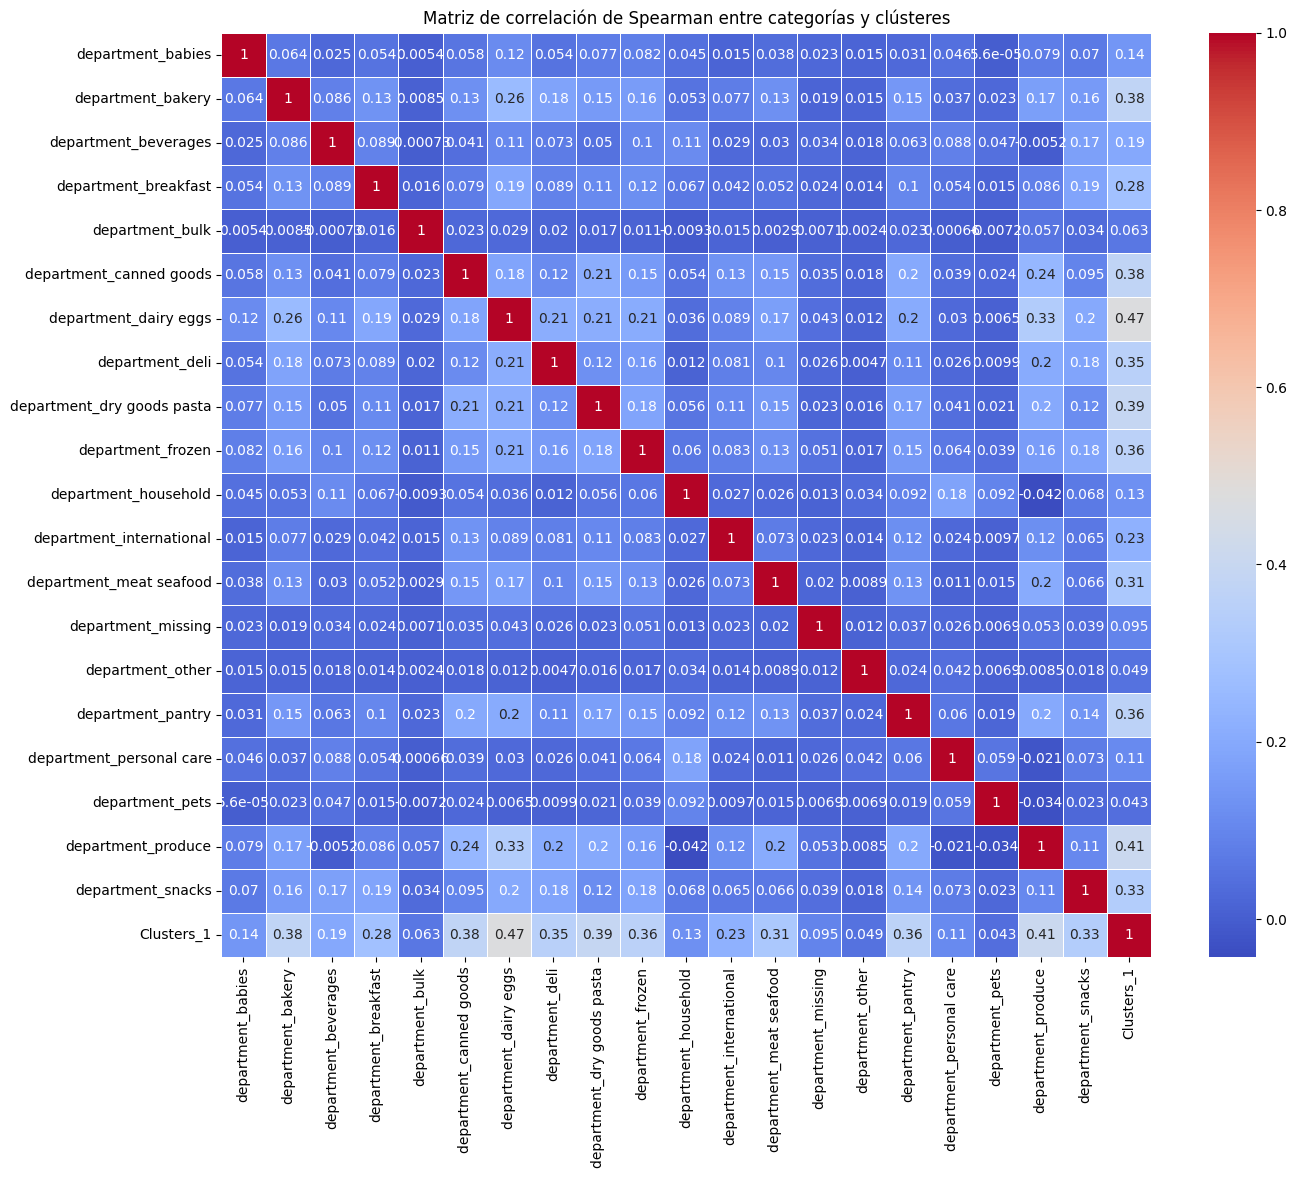

In [16]:
correlations = df[department_columns + ['Clusters_1']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

Correlaciones entre Departamentos:

department_canned goods y department_bulk: Con una correlación alta (0.79), estos departamentos parecen estar asociados, lo que indica que los consumidores que compran productos enlatados también tienden a comprar productos a granel. Esta relación puede reflejar un patrón de compras de abastecimiento o almacenamiento.

department_household y department_international: La correlación de 0.92 entre estos dos departamentos indica que los consumidores que compran productos para el hogar también están interesados en productos internacionales, lo cual podría ser característico de compradores que buscan variedad o productos especializados.

department_deli y department_dairy eggs: Tienen una correlación de 0.82, lo que puede sugerir que los consumidores que compran productos frescos de delicatessen también buscan productos lácteos, lo cual es común en patrones de compras relacionadas con alimentos perecederos.

Las altas correlaciones entre ciertos departamentos, como canned goods y bulk, sugieren que estos productos pueden venderse en paquetes o promociones cruzadas. Esto podría atraer a consumidores que buscan abastecerse o comprar en grandes cantidades.

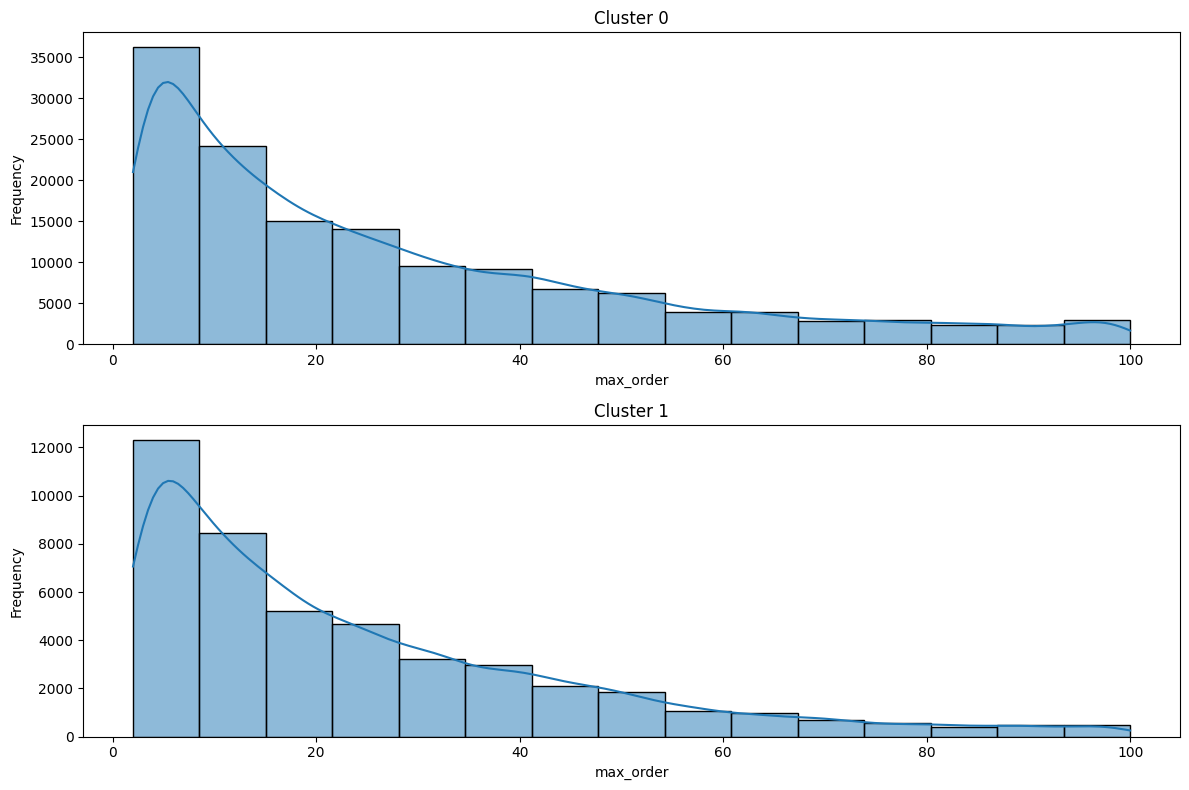

In [17]:
clusters_1 = df['Clusters_1'].unique()
n_clusters = len(clusters_1)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_1):
    sns.histplot(df[df['Clusters_1'] == cluster]['max_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('max_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Posible denominación de Clusters

Clúster 0: "Consumidores Generales o Ocasionales"

Este clúster no muestra correlaciones fuertes con categorías específicas, lo que sugiere que estos usuarios tienen un patrón de compra más diverso o menos definido. Podrían representar consumidores ocasionales que compran una variedad de productos sin una inclinación marcada hacia una categoría particular.
Clúster 1: "Consumidores de Productos Frescos y Snacks"

Este clúster presenta correlaciones positivas con categorías como produce, dairy eggs, y snacks, lo que indica una preferencia por productos frescos y de consumo rápido. Estos usuarios parecen buscar alimentos frescos y productos listos para consumir, lo cual puede reflejar un perfil de compradores frecuentes o que buscan opciones saludables y rápidas.

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


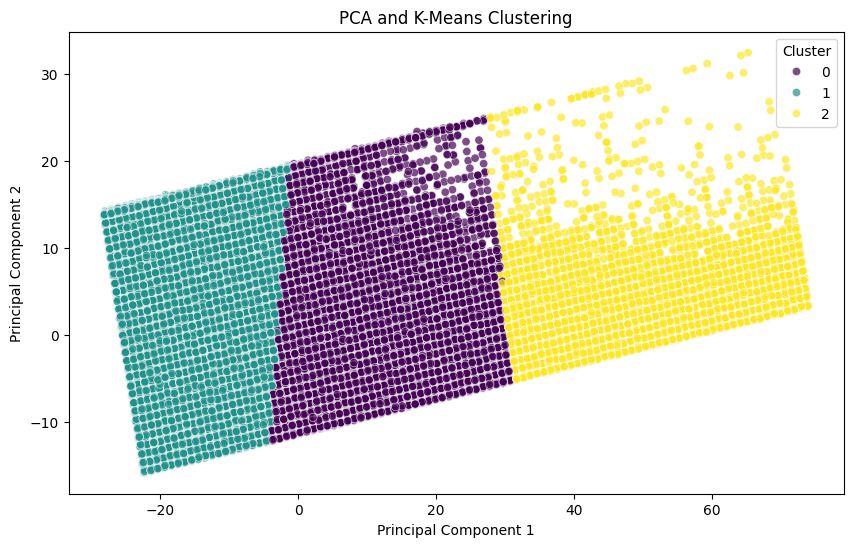

In [23]:
n_clusters = 3

kmeans2 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans2.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [24]:
df['Clusters_2'] = kmeans2.labels_

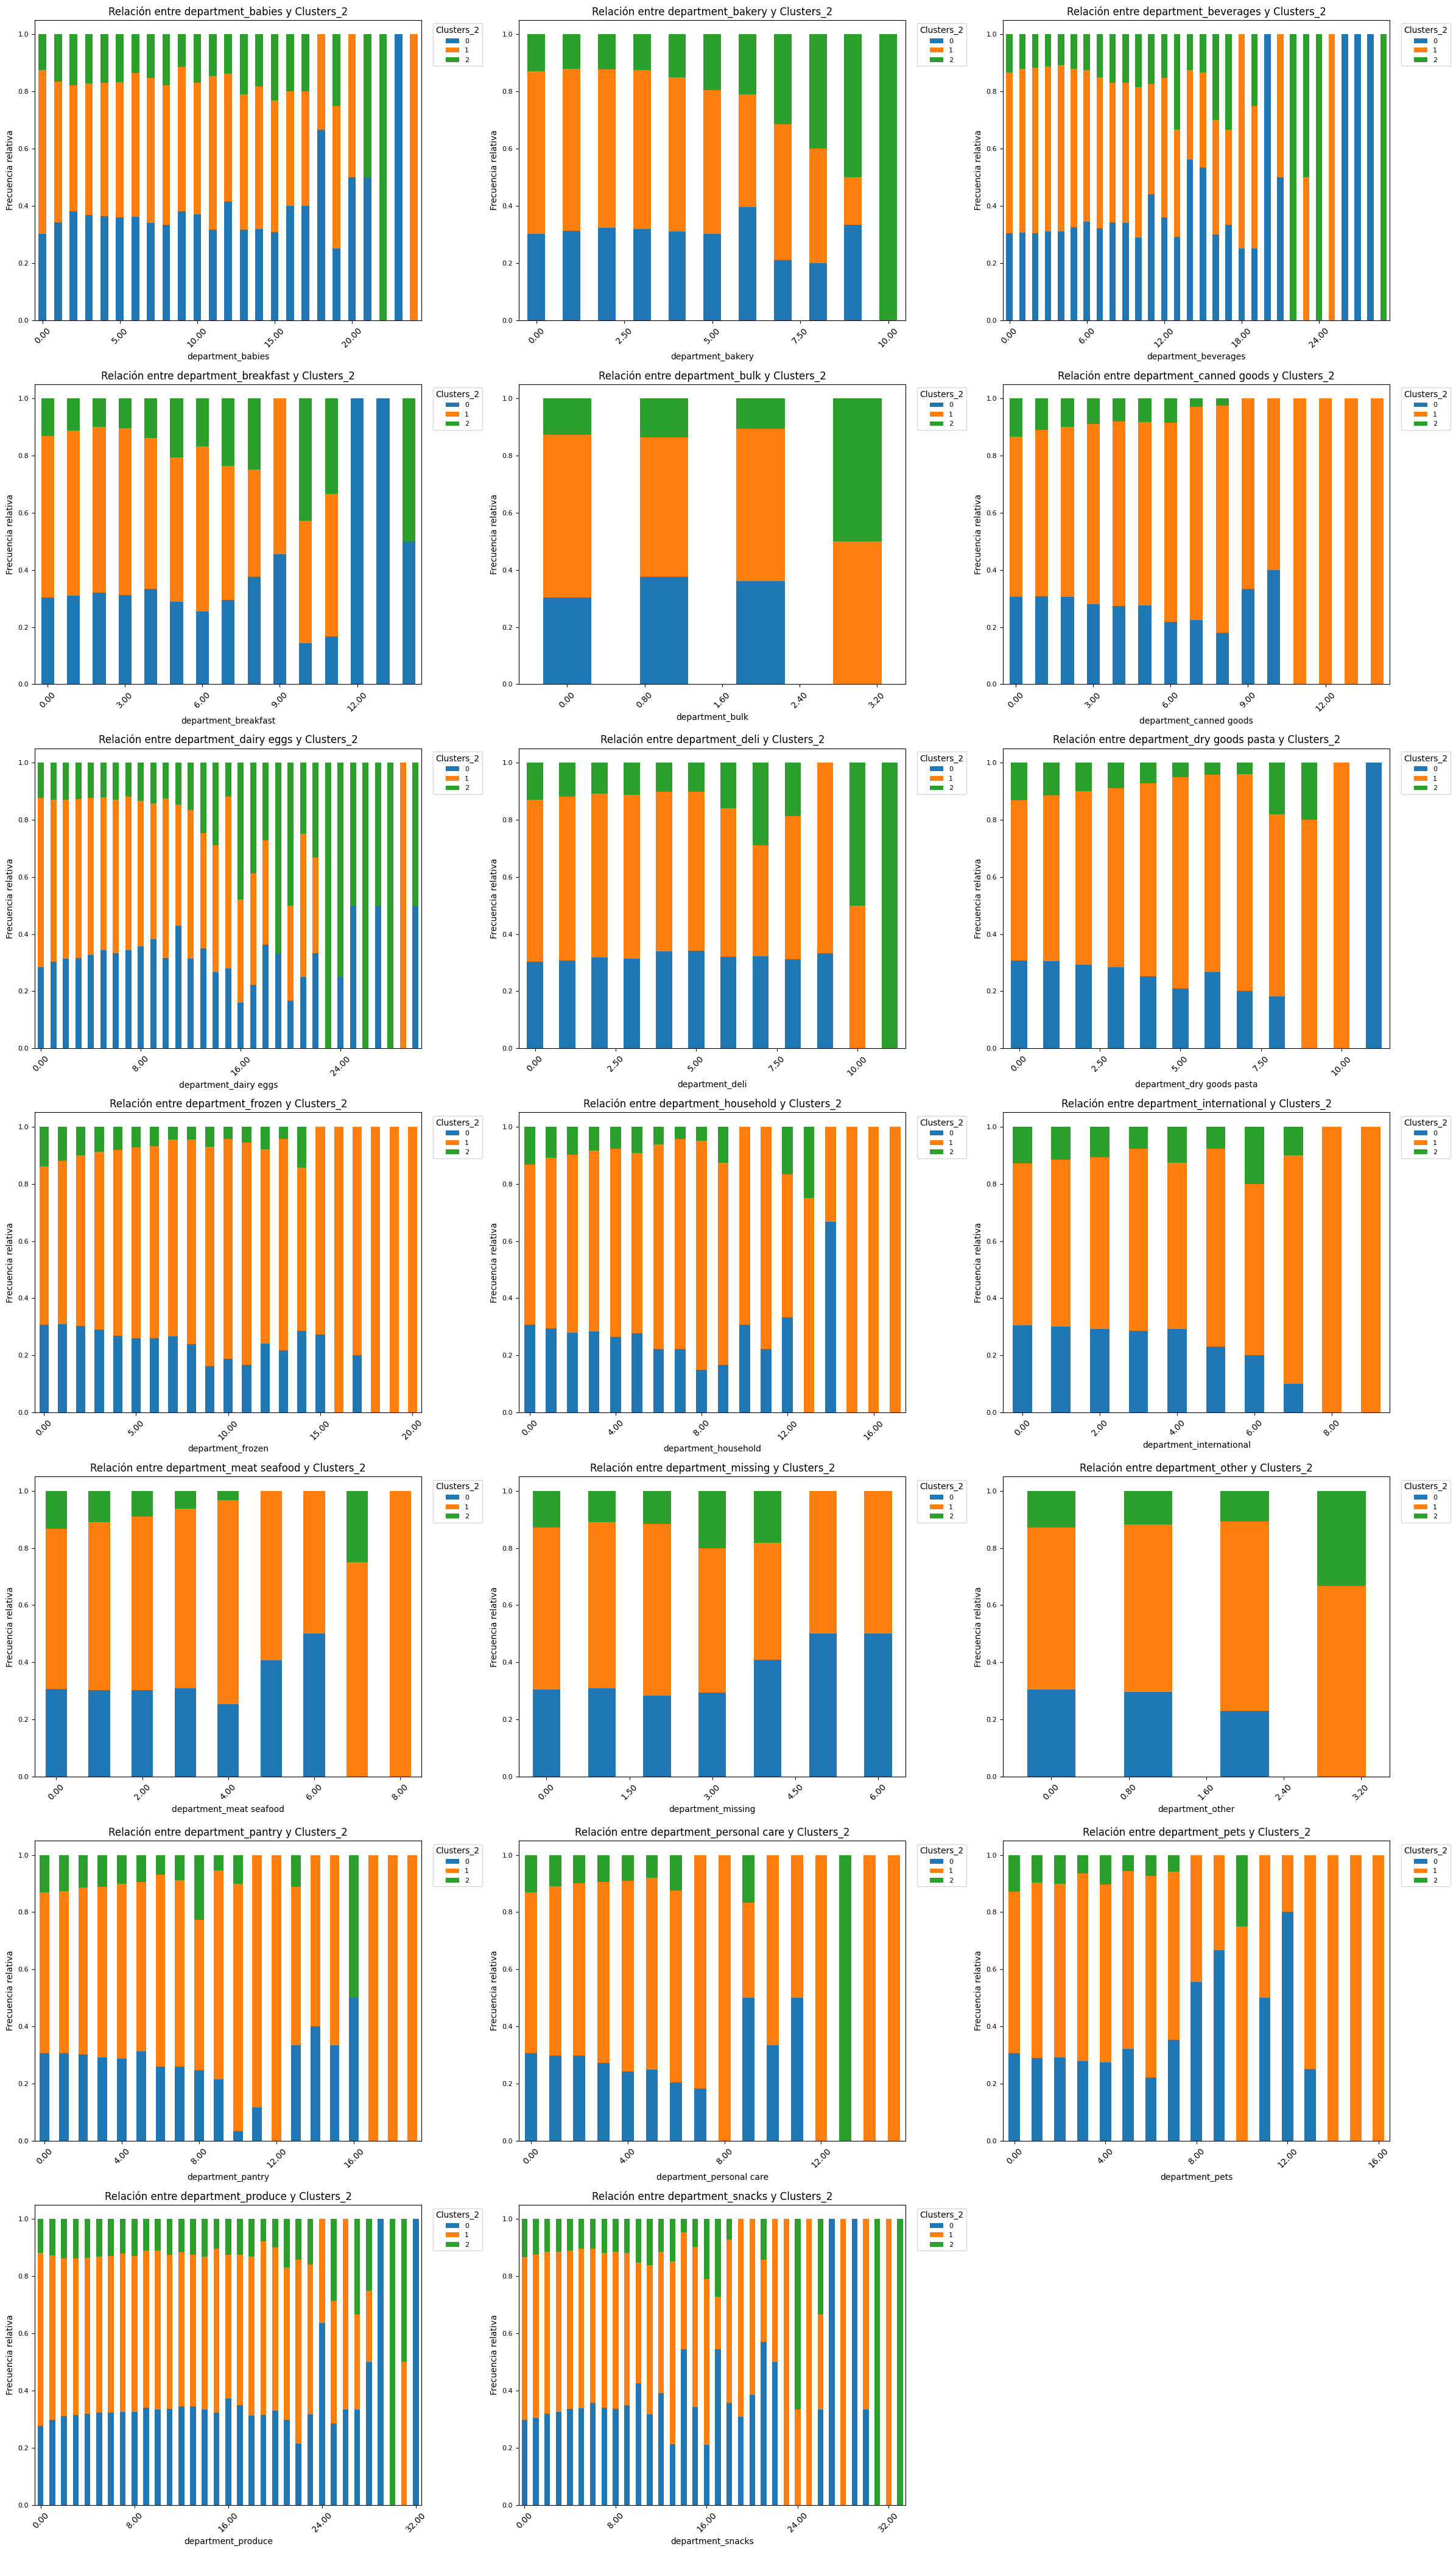

In [25]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_2'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_2', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_2', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

### Descripción de los clústeres:

Clúster 0:

Características de los clientes: Los clientes en este clúster muestran una fuerte preferencia por departamentos como produce, breakfast y beverages. Estos clientes probablemente están interesados en productos de consumo diario o semanal, priorizando artículos perecederos y alimentos frescos.

Comportamientos de compra: Tienden a hacer compras más orientadas a artículos esenciales y de uso frecuente. Es posible que se trate de clientes que hacen compras familiares, buscan abastecerse con productos saludables o frescos, o simplemente realizan compras grandes para consumo en el hogar.

Clúster 1:

Características de los clientes: Este grupo se asocia con una mayor diversidad en los departamentos de compra, con un enfoque en productos relacionados a mascotas, enlatados, envasados y congelados. Las caracteristicas de las compras realizadas por los usuarios englobados en este cluster indican la posibilidad de que se trate de personas jovenes, solteras o estudiantes.

Comportamientos de compra: Tienden a realizar compras que incluyen productos de conveniencia y artículos para reuniones o actividades sociales. Podrían ser clientes más jóvenes o aquellos que hacen compras para el consumo personal o de grupos pequeños.

Clúster 2:

Características de los clientes: Los clientes en este clúster tienen un enfoque más esporadico, mostrando niveles de compra menores al de los reflejados en los clusters anteriormente analizados. Tienen preferencia por departamentos como: snacks, produce, dairy eggs y bakery.

Comportamientos de compra: probablemente sean personas que realizan compras en caso de emergencia o extrema necesidad.

In [54]:
stats = df.groupby('Clusters_2').agg(['mean', 'median'])

mode_df = df.groupby('Clusters_2').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

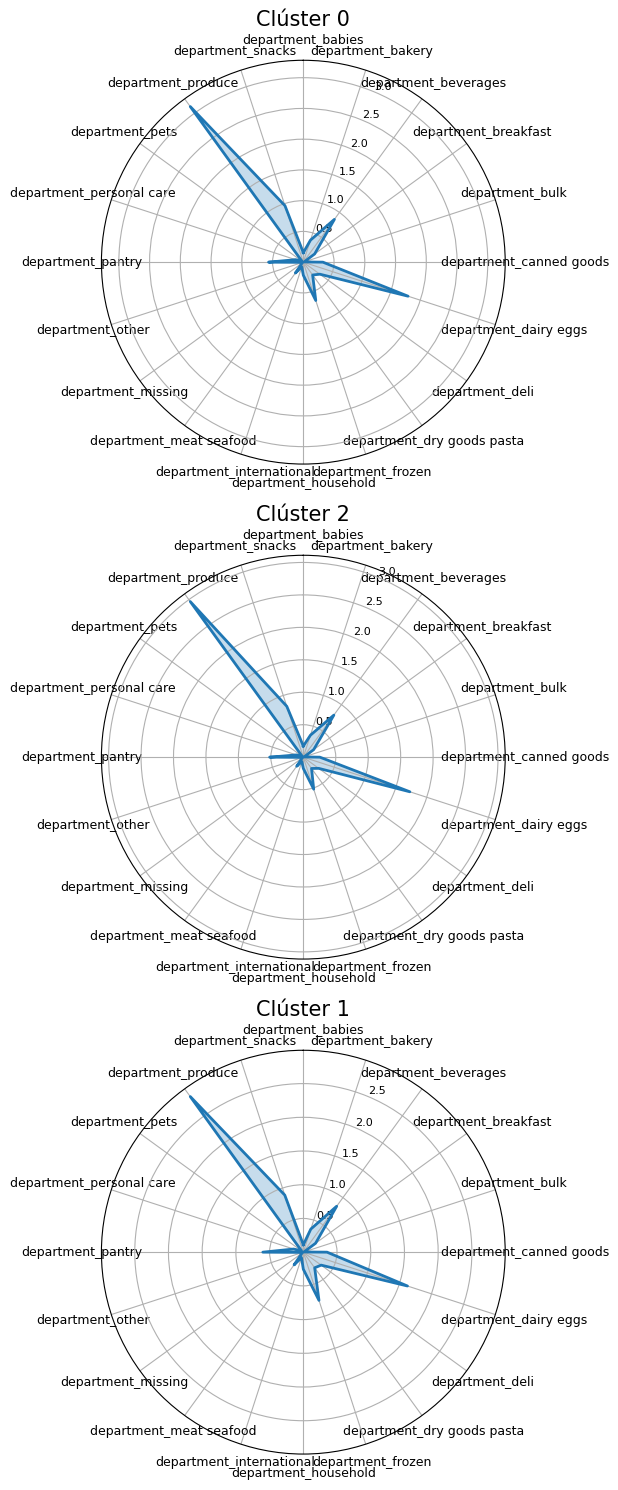

In [ ]:
num_clusters = df['Clusters_2'].nunique()
categories = department_columns

fig, axes = plt.subplots(num_clusters, 1, subplot_kw={'polar': True}, figsize=(10, 15))

for i, cluster in enumerate(df['Clusters_2'].unique()):
    values = df[df['Clusters_2'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1] 
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

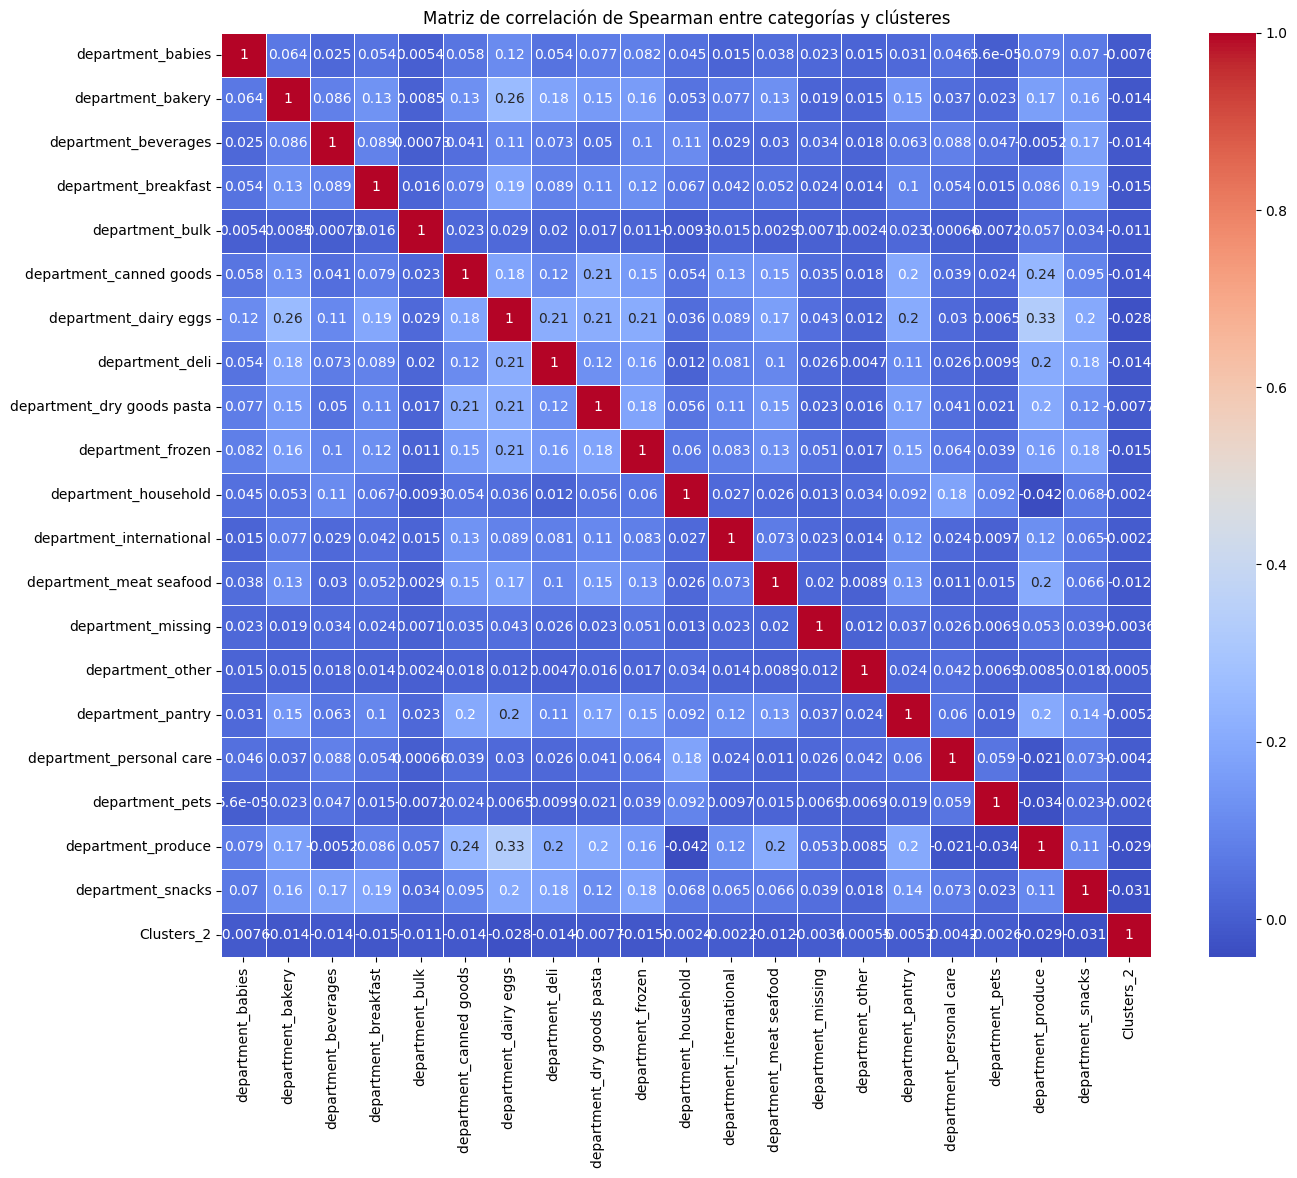

In [32]:
correlations = df[department_columns + ['Clusters_2']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


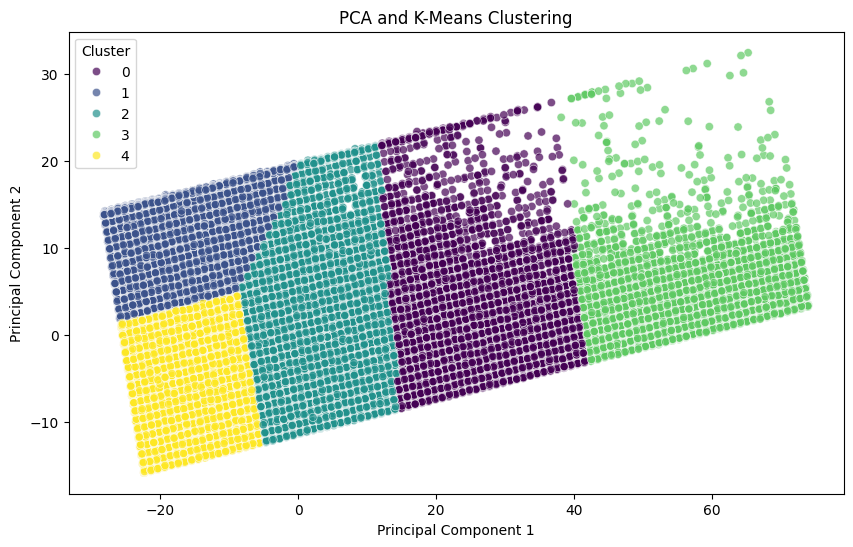

In [33]:
n_clusters = 5

kmeans3 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans3.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c3 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c3['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c3, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [34]:
df['Clusters_3'] = kmeans3.labels_

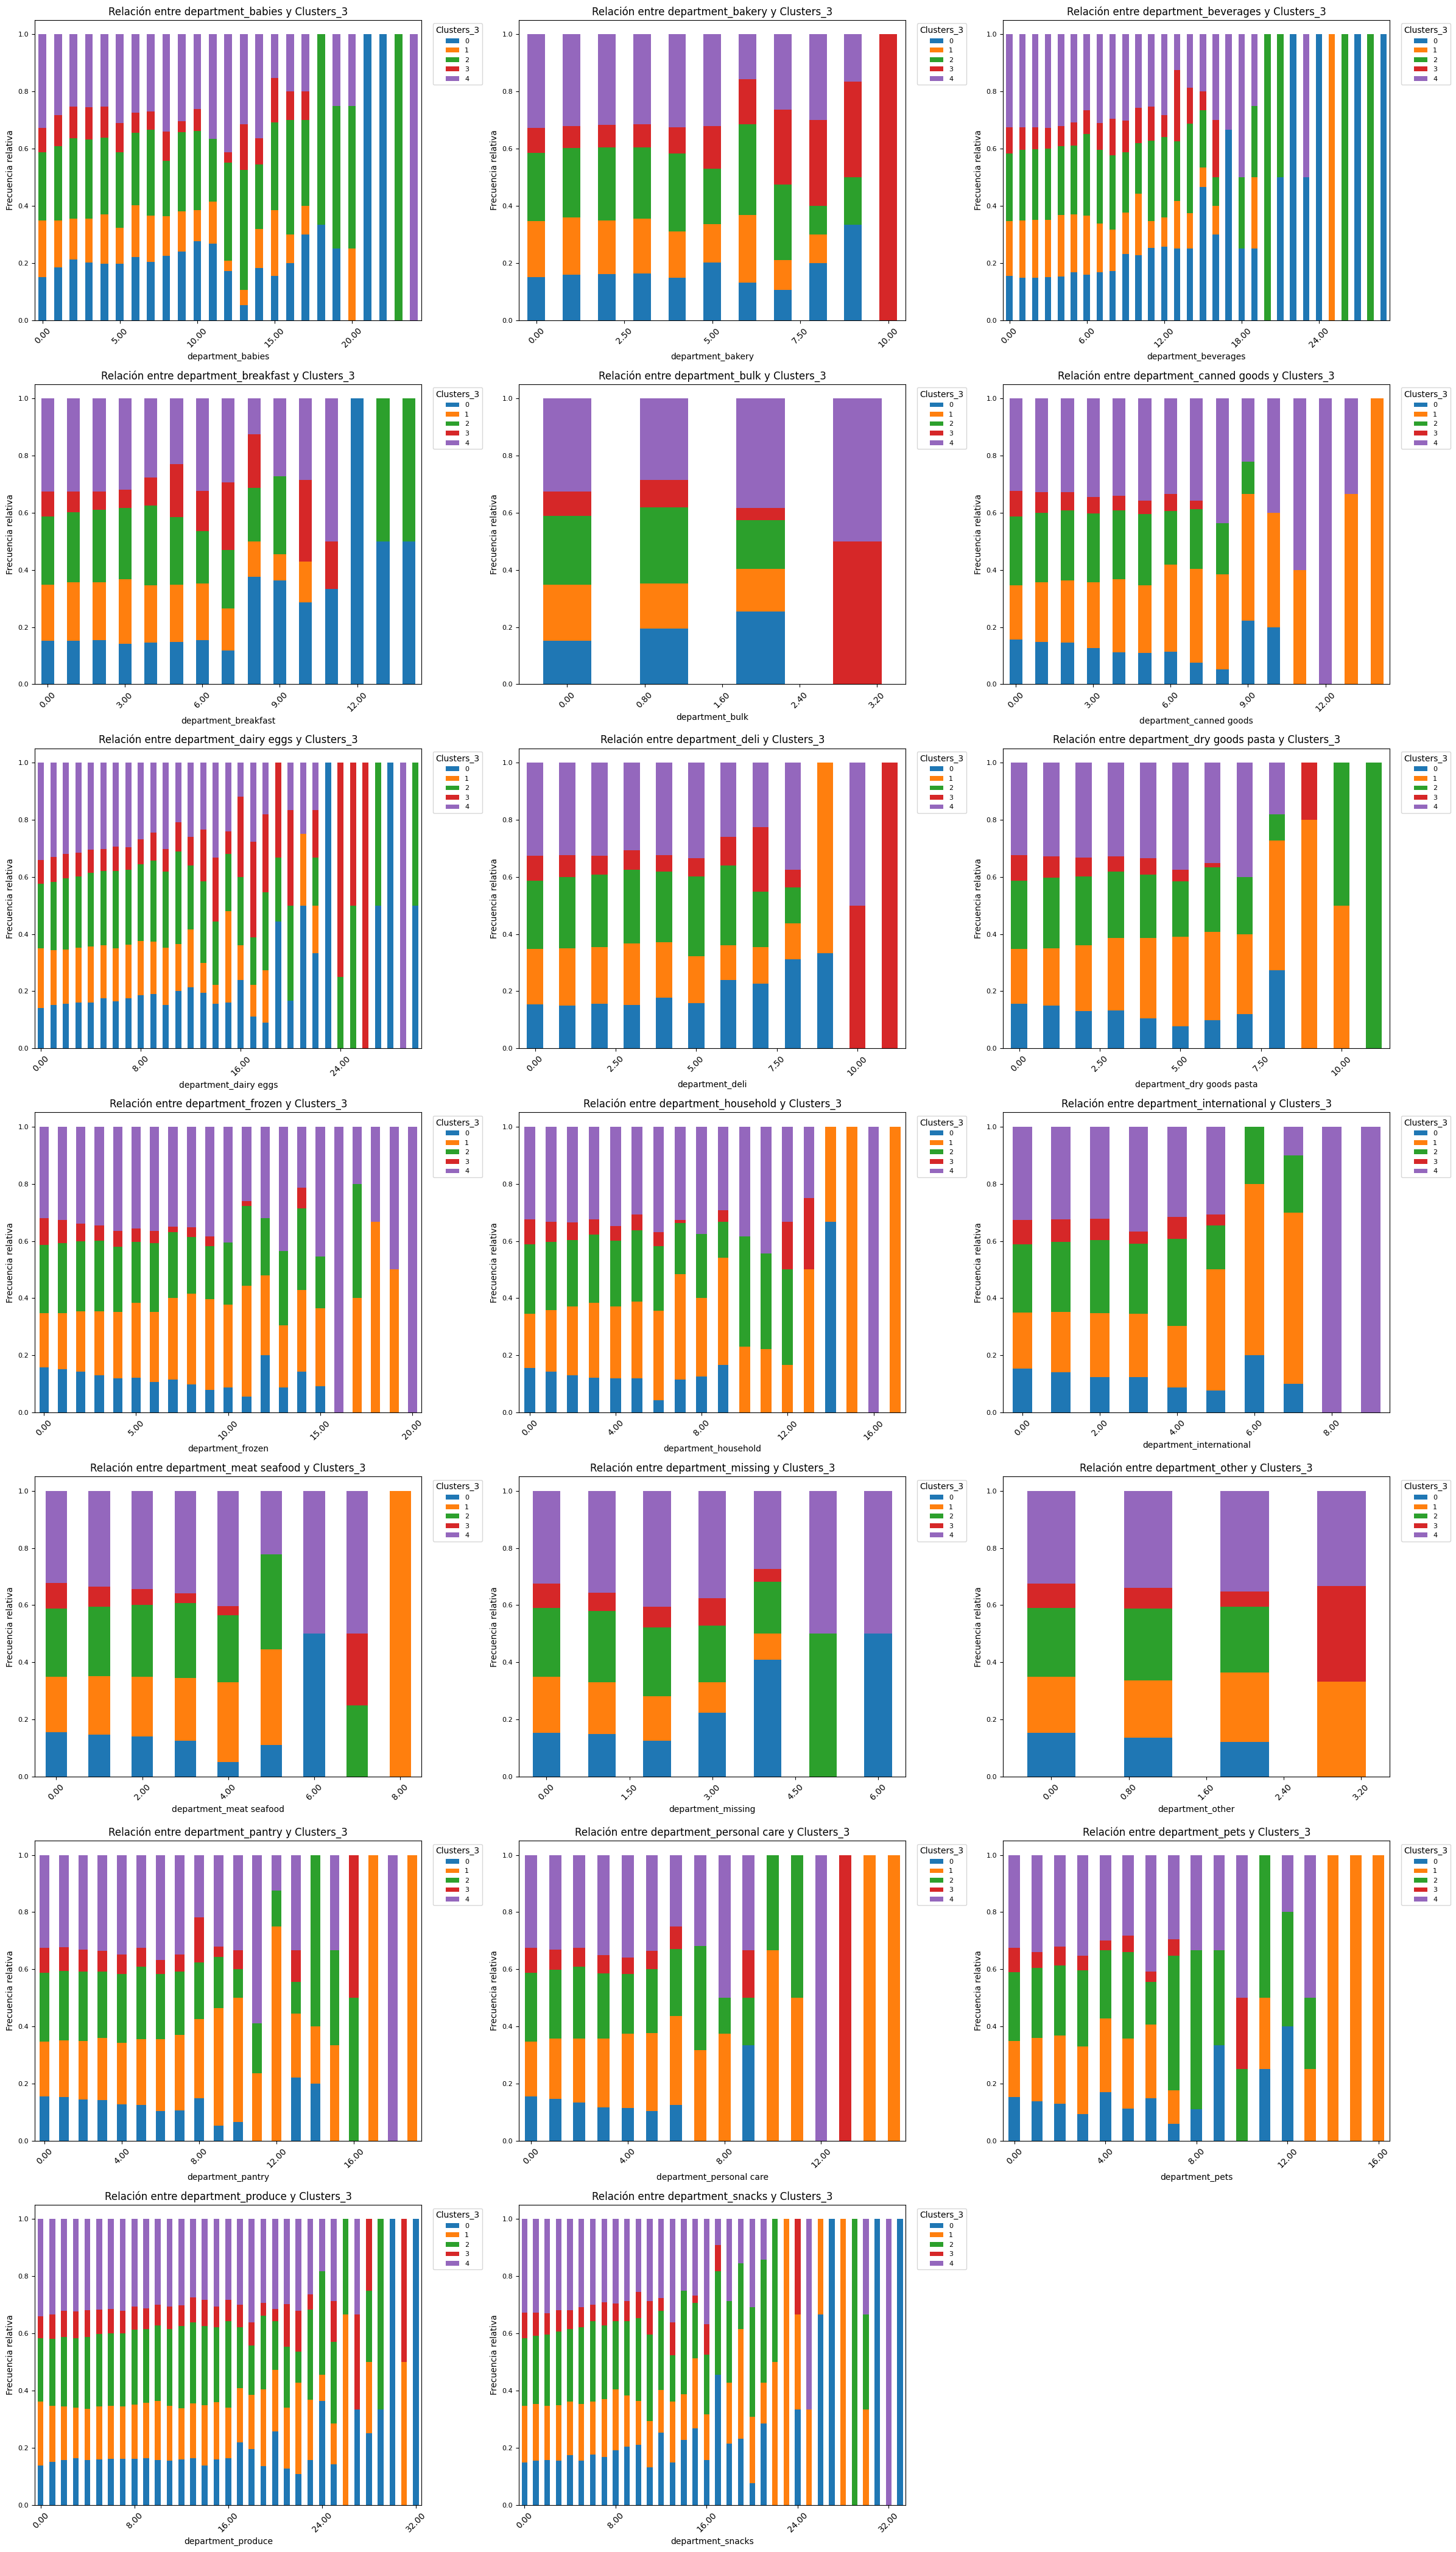

In [35]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_3'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_3', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

In [38]:
stats = df.groupby('Clusters_3').agg(['mean', 'median'])

mode_df = df.groupby('Clusters_2').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

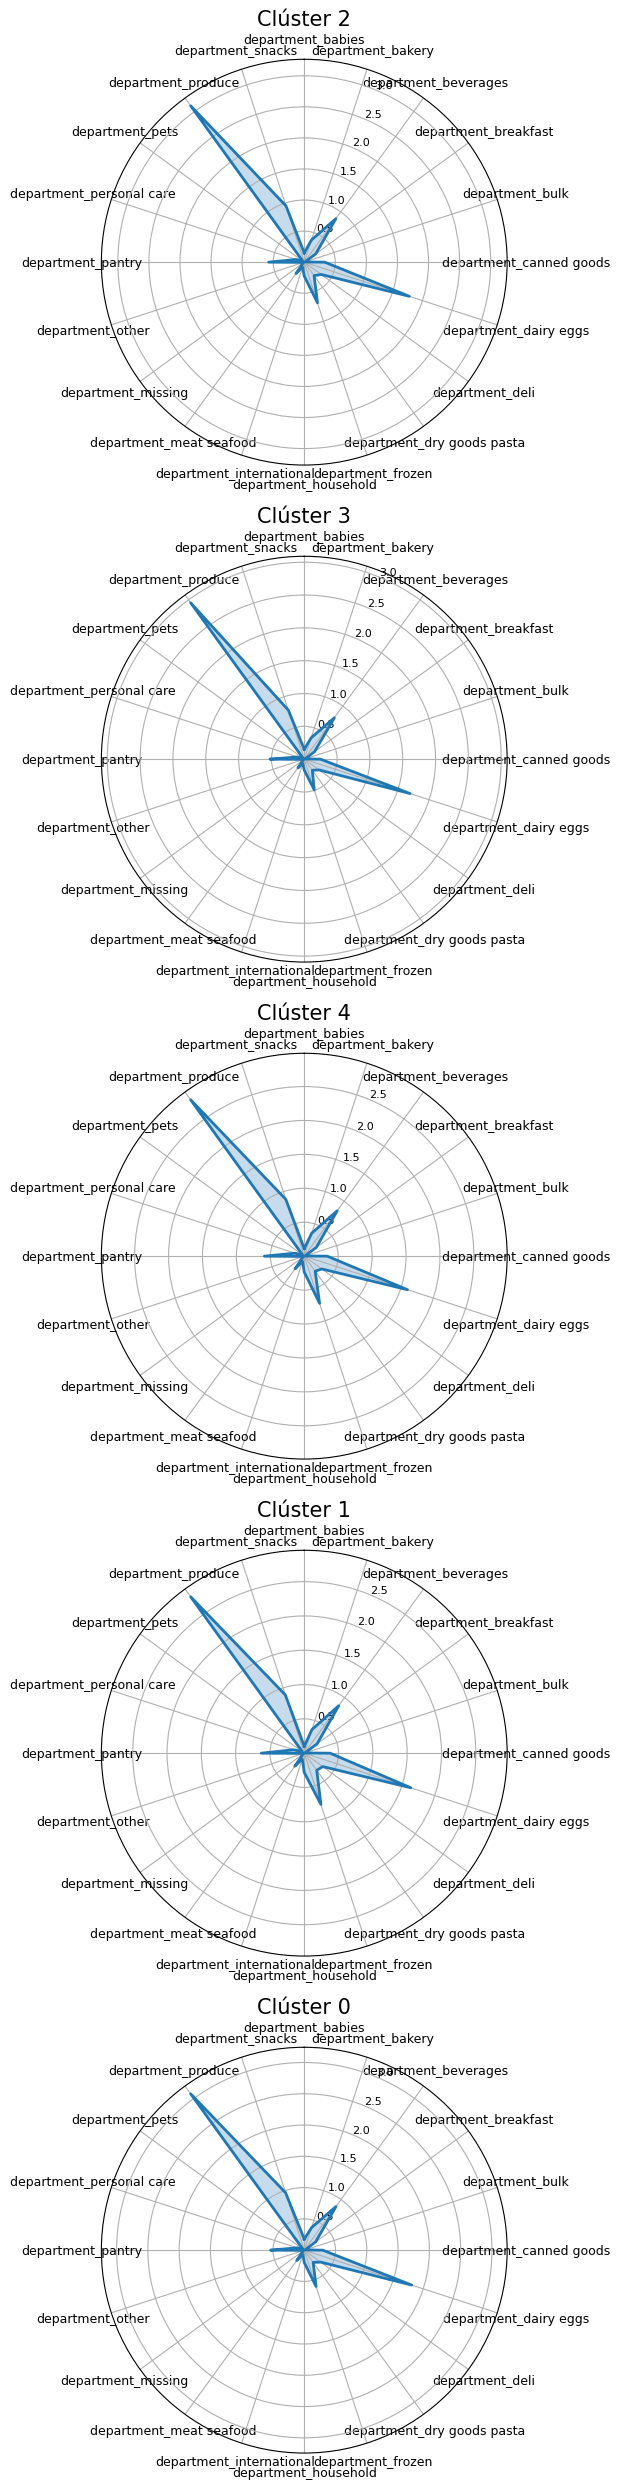

In [42]:
num_clusters = df['Clusters_3'].nunique()
categories = department_columns

fig, axes = plt.subplots(num_clusters, 1, subplot_kw={'polar': True}, figsize=(20, 25))

for i, cluster in enumerate(df['Clusters_3'].unique()):
    values = df[df['Clusters_3'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1] 
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

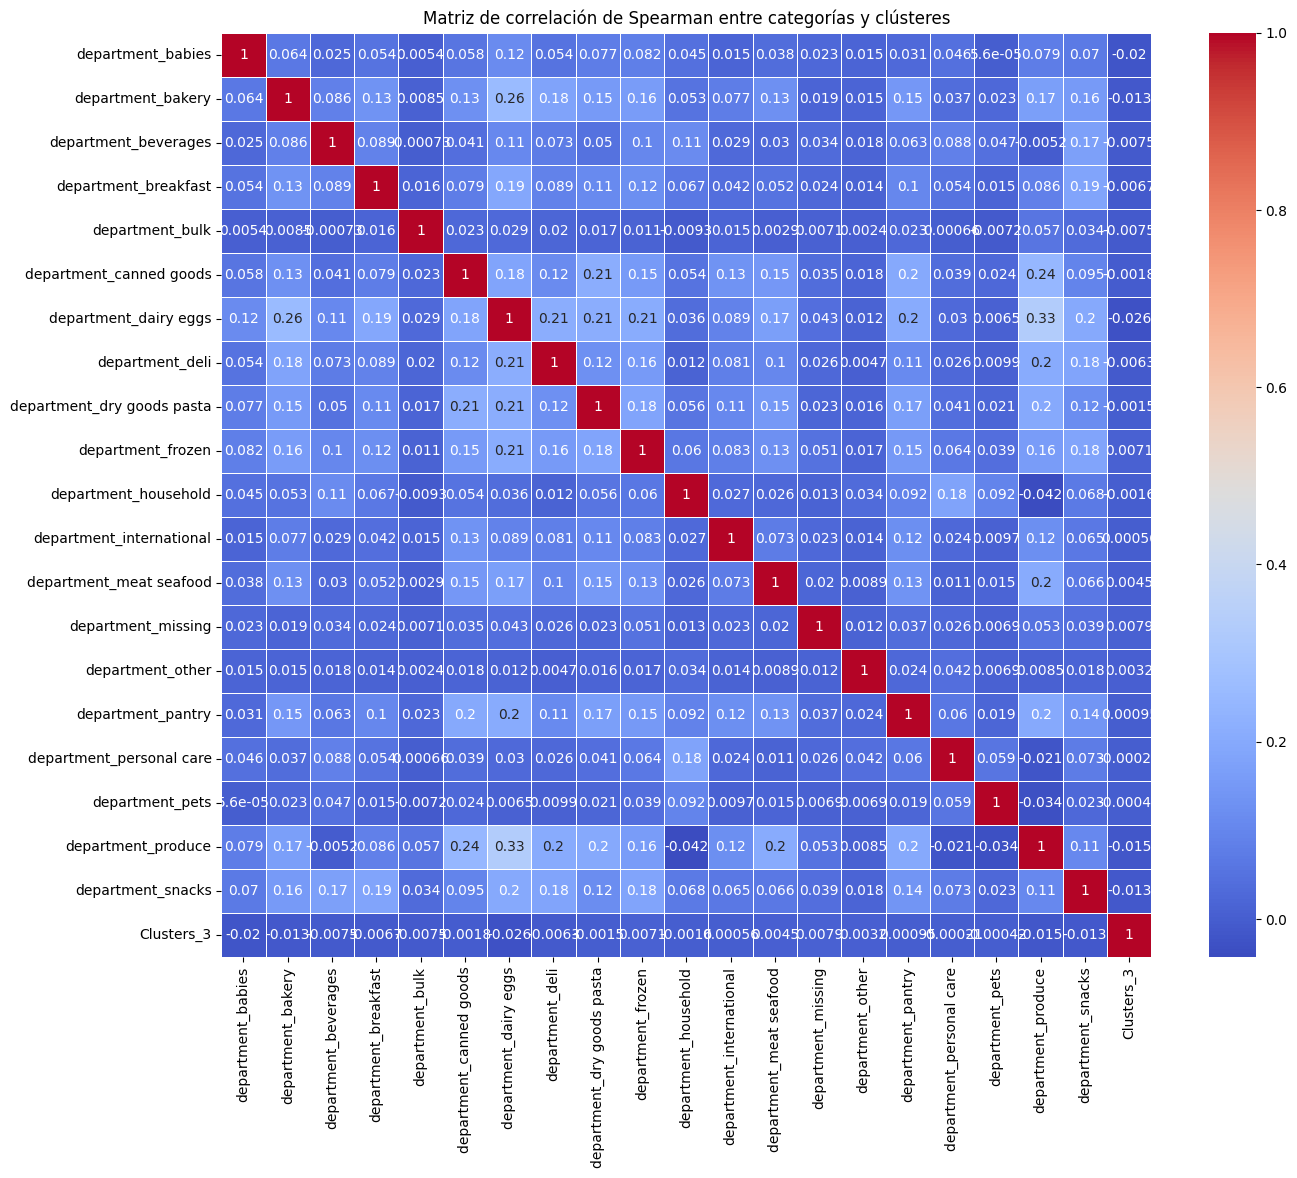

In [44]:
correlations = df[department_columns + ['Clusters_3']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

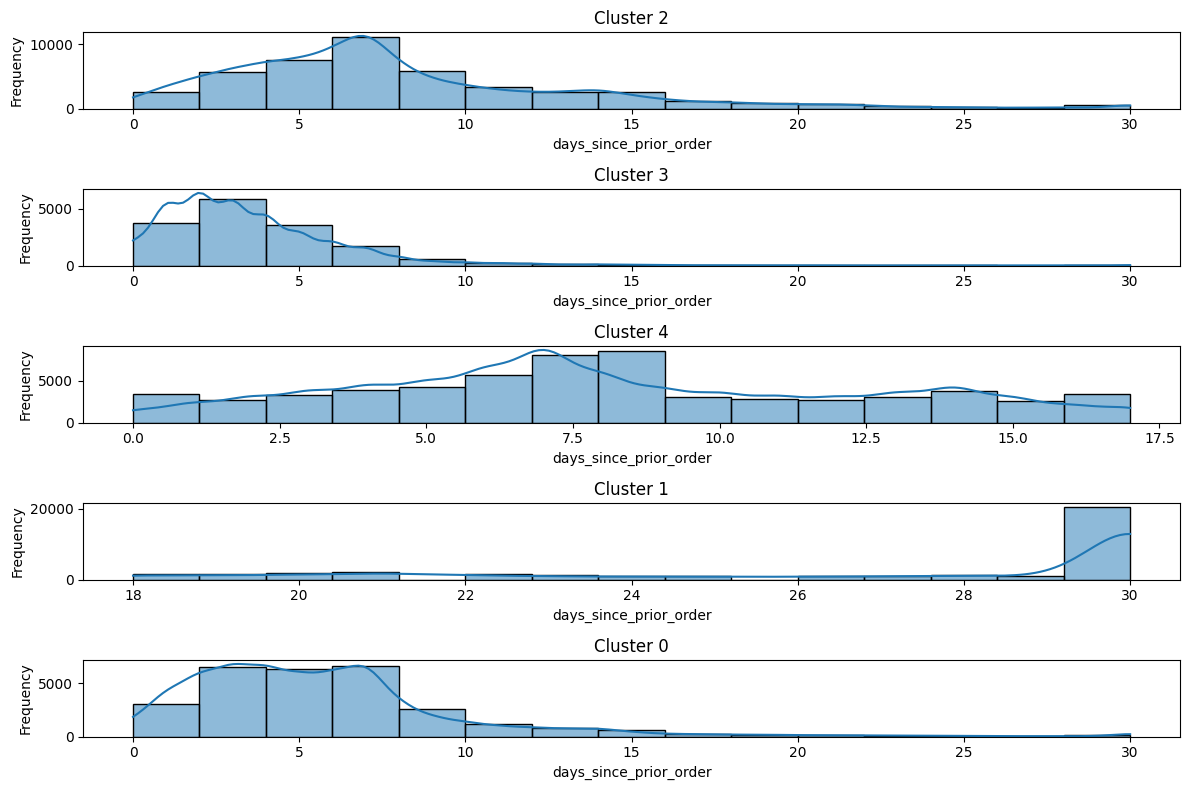

In [43]:
clusters_3 = df['Clusters_3'].unique()
n_clusters = len(clusters_3)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_3):
    sns.histplot(df[df['Clusters_3'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

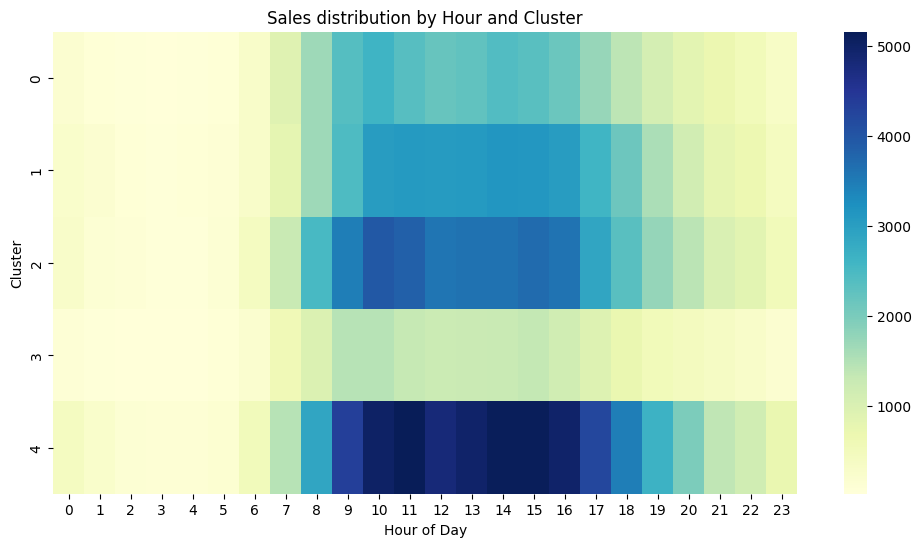

In [45]:
order_hour_counts = df.groupby(['Clusters_3', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Sales distribution by Hour and Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()

##### Clustering using different variables

In [46]:
X2 = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

In [47]:
X_train = X2.values

kmeans4 = KMeans(n_clusters=5, random_state=2)
kmeans4.fit(X_train)

predictions = kmeans4.predict(X_train)

counts = np.bincount(predictions, minlength=5).reshape(1, 5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0      30039      36551      16481      58527      46148

Explained variance ratio (first two components): [0.87658475 0.0963831 ]


<Figure size 640x480 with 0 Axes>

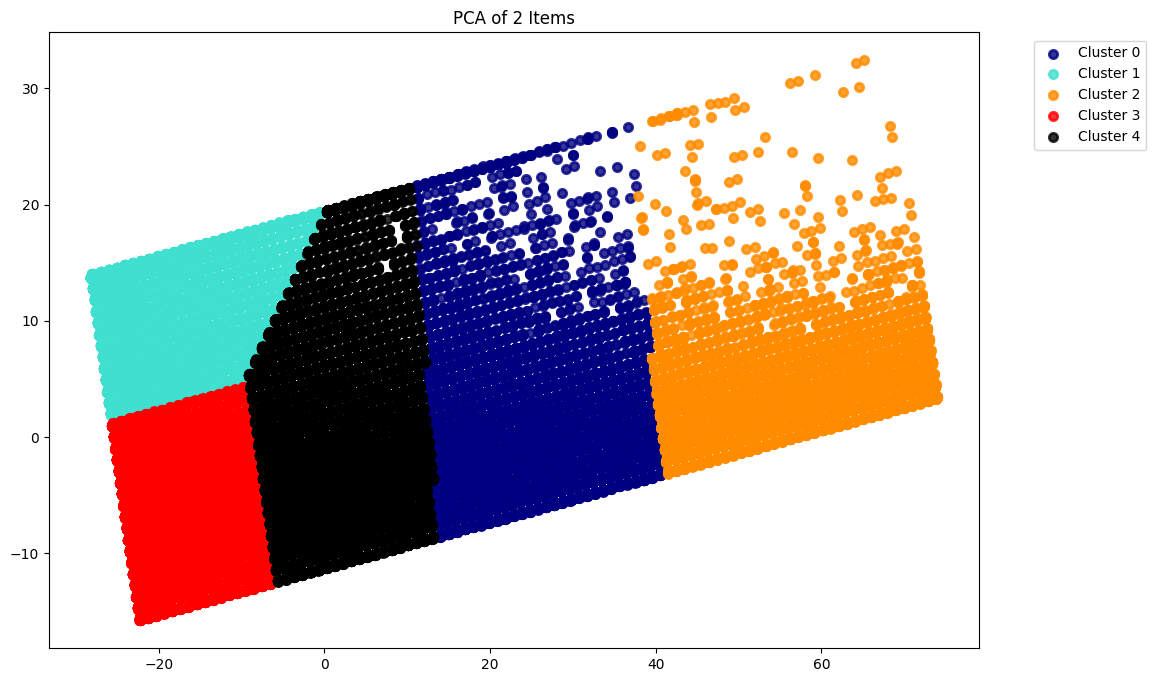

In [48]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [49]:
df['Clusters_4'] = kmeans4.labels_

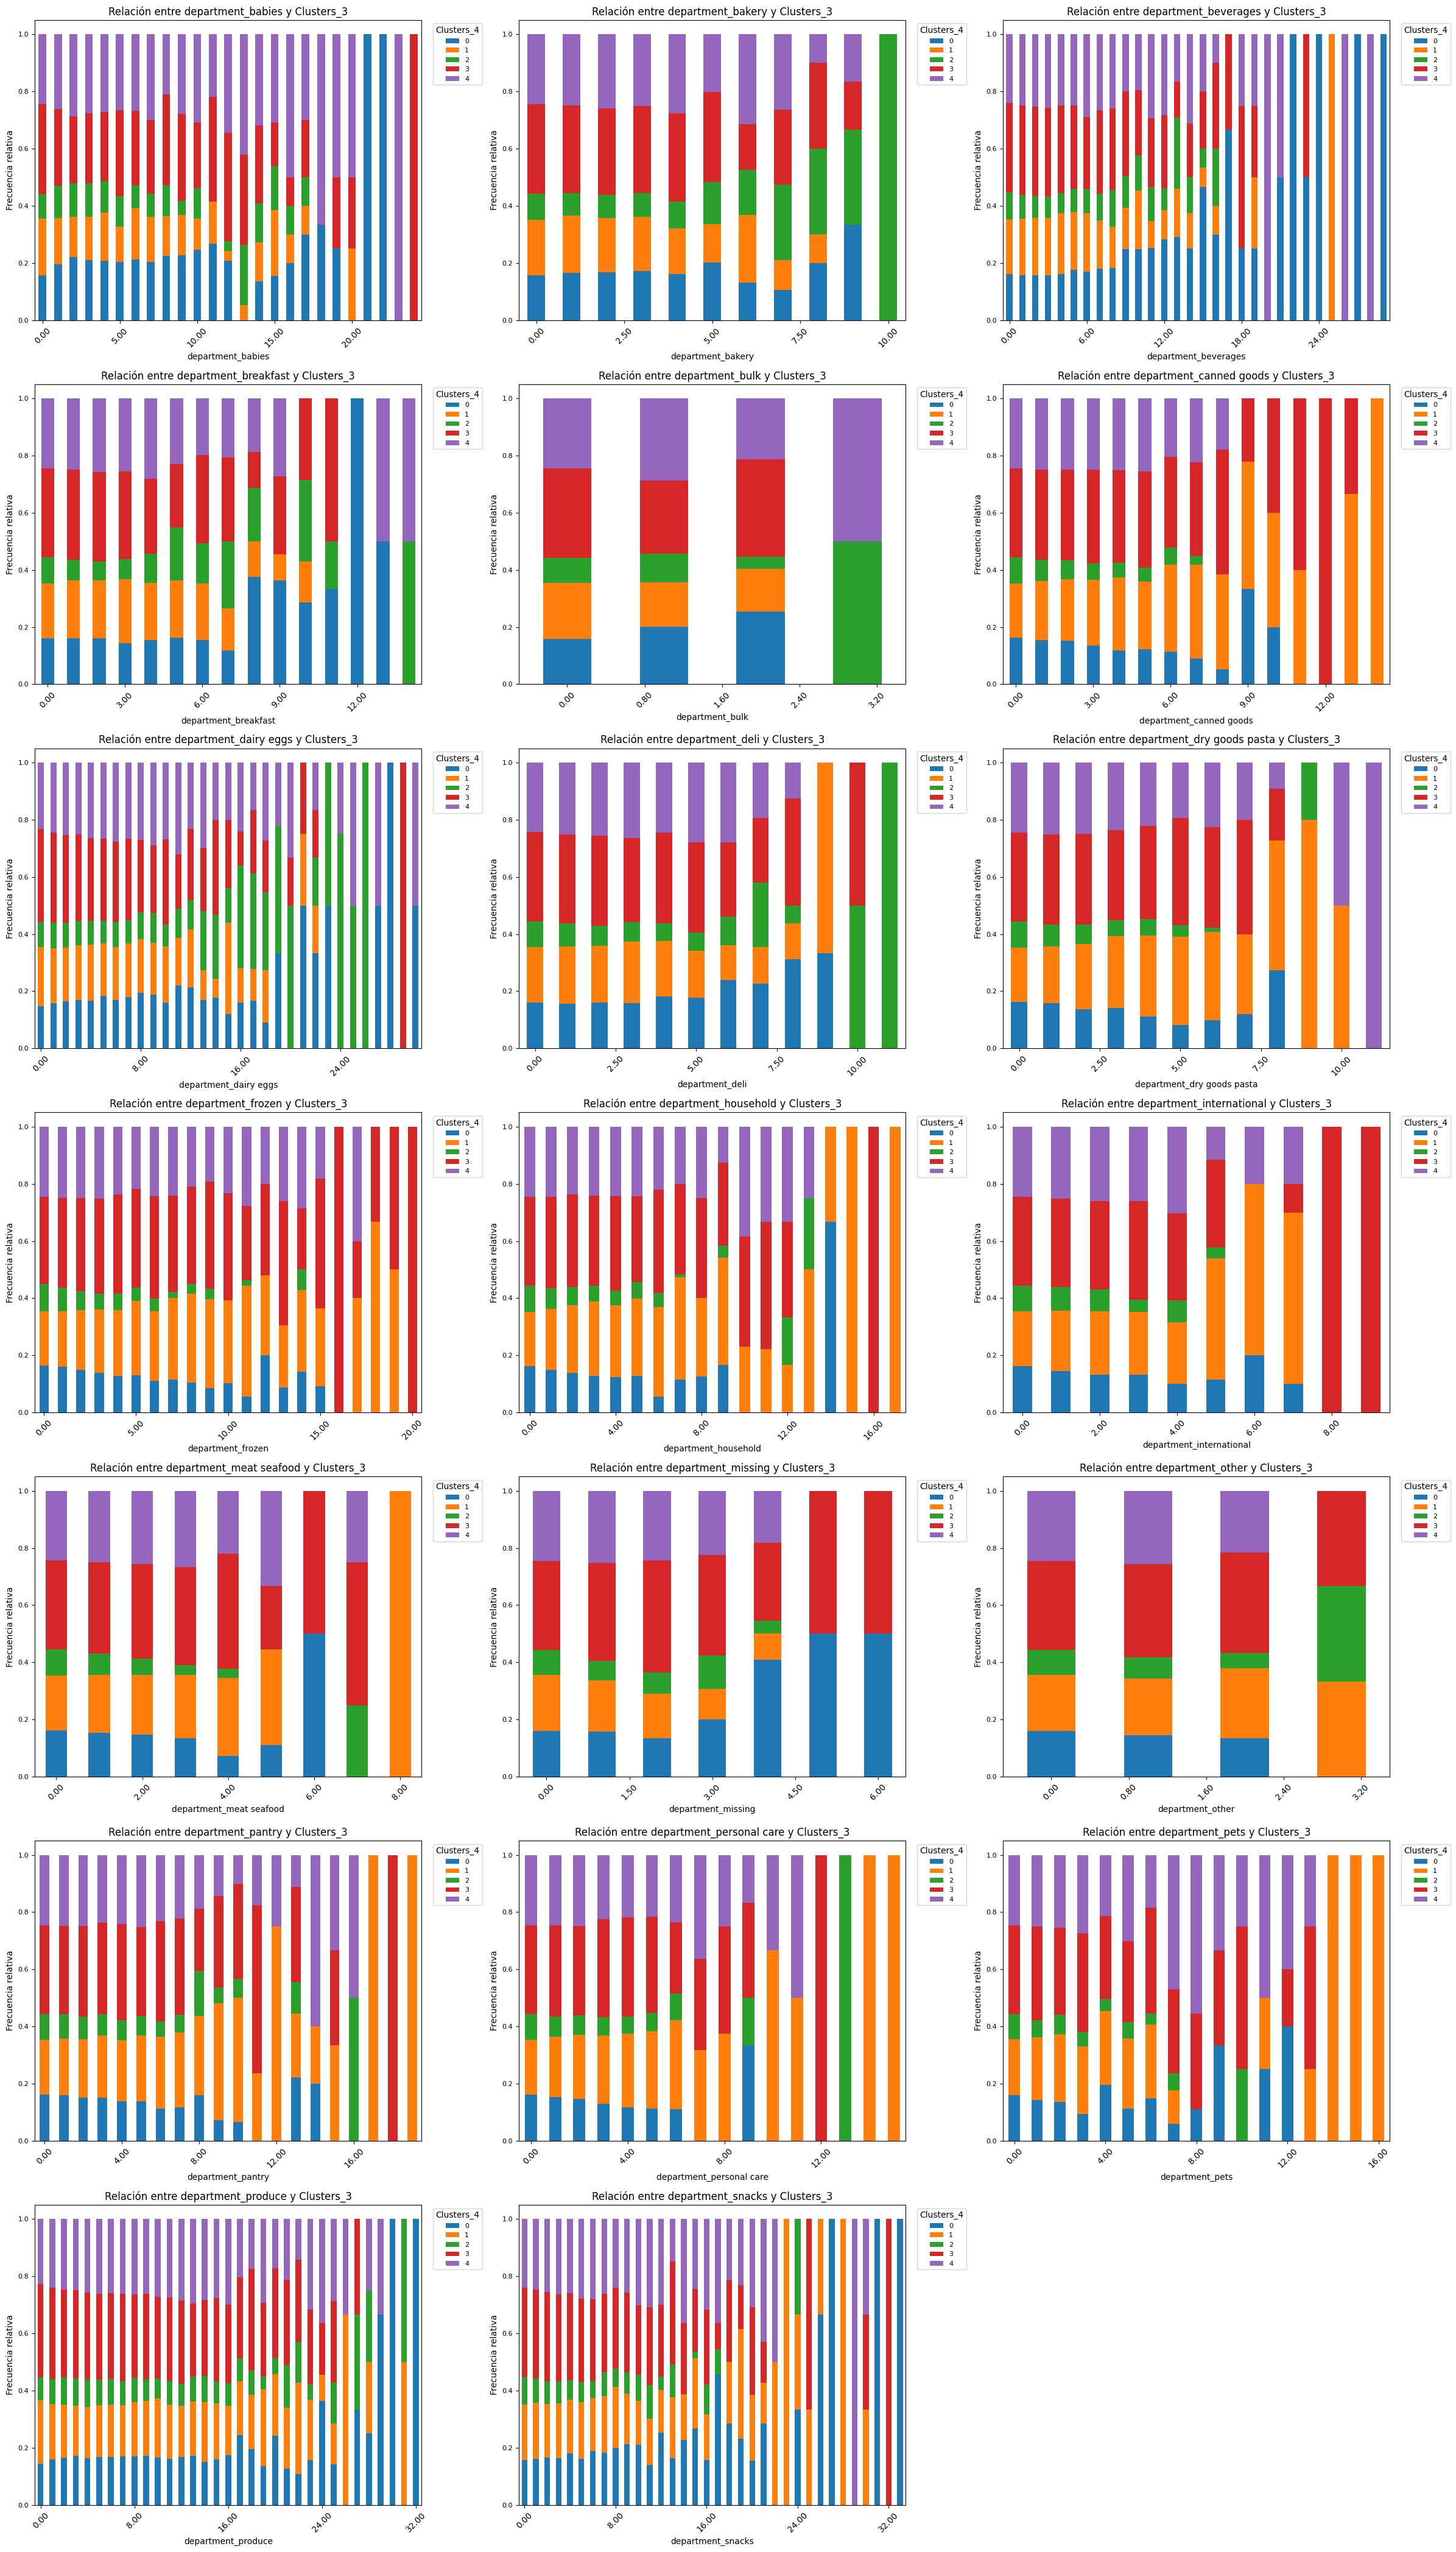

In [51]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_4'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_4', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

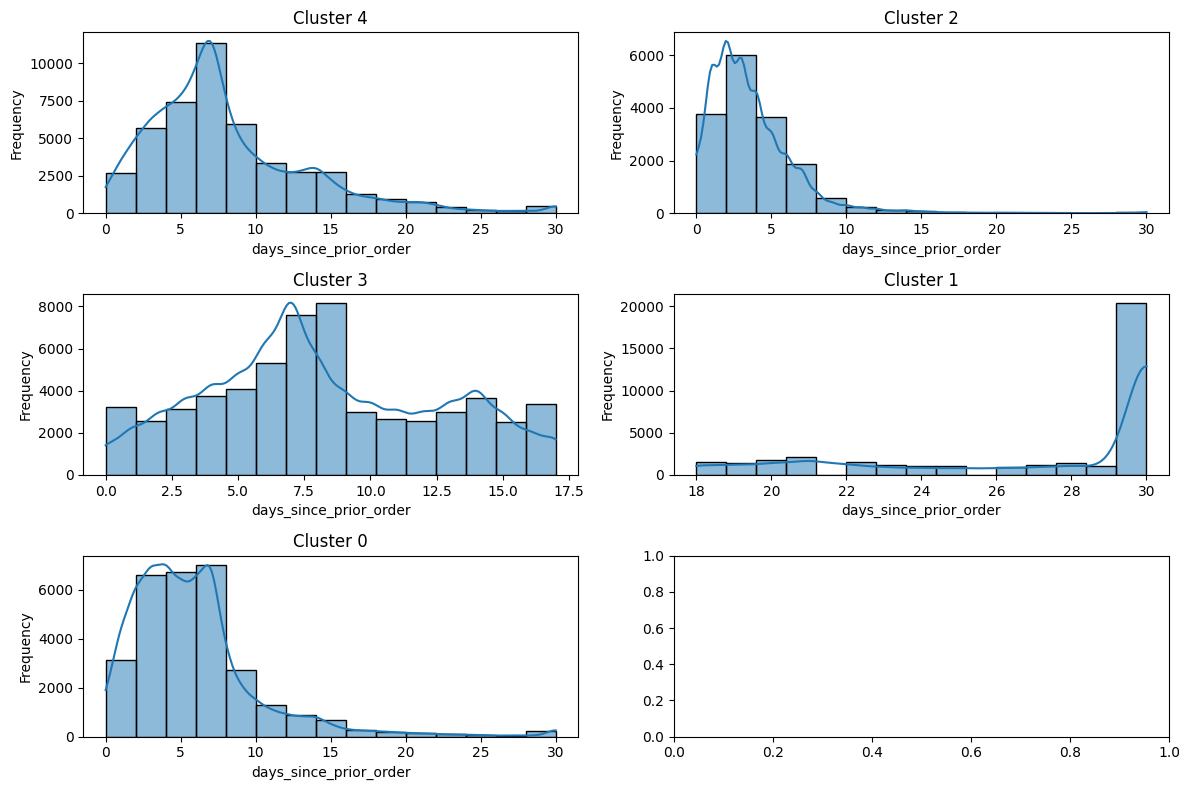

In [52]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

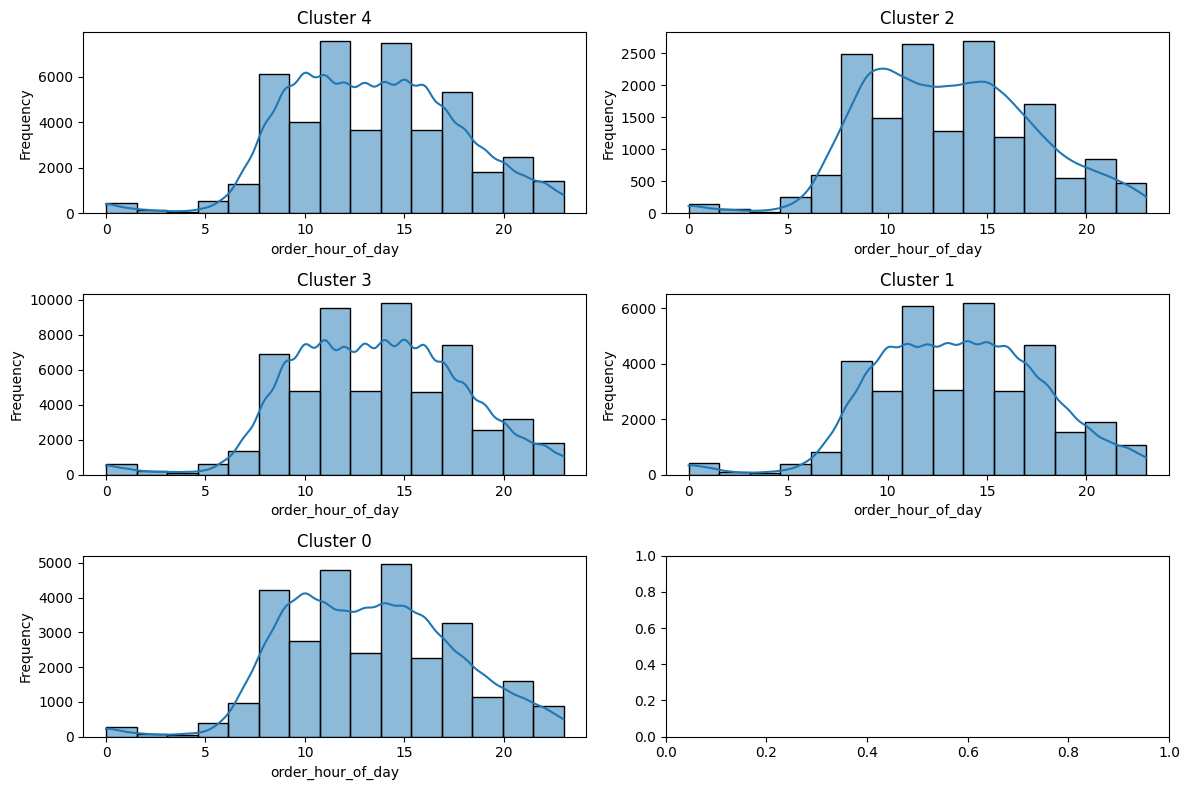

In [53]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['order_hour_of_day'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

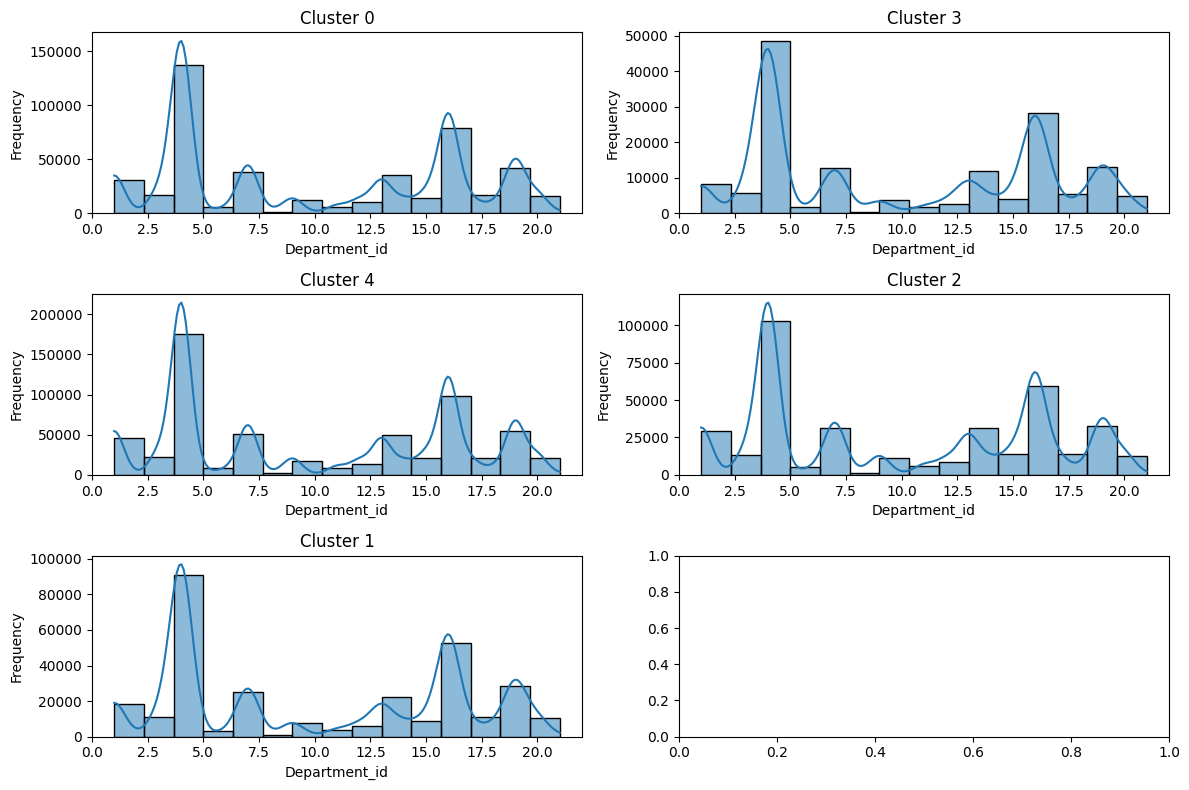

In [ ]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['department_id'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('Department_id')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()